In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import koreanize_matplotlib
import numpy as np 

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name) 

In [80]:
# [1] 파일 불러오기
seoul_df = pd.read_excel('./송파구남자.xlsx')
seoul2_df = pd.read_excel('./송파구여자.xlsx')

In [66]:
display(seoul_df)

,year,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,2024,8473,12762,14814,14007,15701,22325,26998,23736,26546,...,22853,21912,19900,13876,9806,5619,2286,597,131,20


In [73]:
seoul_df.set_index(seoul_df['year'], inplace=True)
seoul_df.drop('year', axis=1, inplace=True)

In [74]:
seoul_df


,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
year,,,,,,,,,,,,,,,,,,,,,
2024,8473,12762,14814,14007,15701,22325,26998,23736,26546,23916,...,22853,21912,19900,13876,9806,5619,2286,597,131,20


In [76]:
seoul2_df.set_index(seoul2_df['year'], inplace=True)
seoul2_df.drop('year', axis=1, inplace=True)

In [77]:
seoul2_df

,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
year,,,,,,,,,,,,,,,,,,,,,
2024,8138,11767,14296,13733,16317,26699,29307,25853,28797,25470,...,24655,24582,23221,15296,10573,6626,3776,1691,472,67


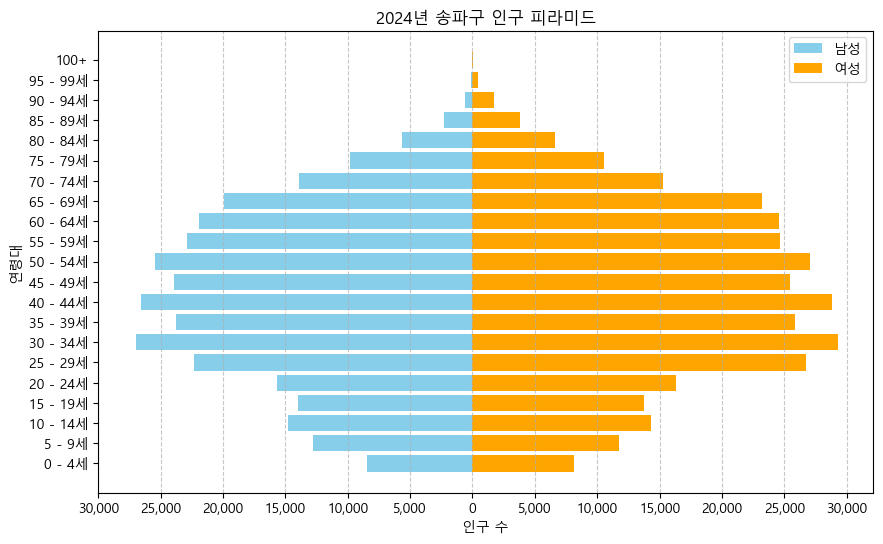

In [79]:
# [3] 인구 피라미드 그래프 함수 생성 
def pyramid(year):
    
    age_labels = seoul_df.columns[:21]
    latest_year = year  # 연도 입력받기

    male_df = seoul_df.loc[latest_year, age_labels] * -1  # 남성 인구 음수화
    female_df = seoul2_df.loc[latest_year, age_labels]  # 여성 인구
    
    # [4] 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.barh(age_labels, male_df, color='skyblue', label='남성')   # 왼쪽(음수) 남성 인구
    plt.barh(age_labels, female_df, color='orange', label='여성')  # 오른쪽(양수) 여성 인구

    # [5] 그래프 설정
    plt.xlabel("인구 수")
    plt.ylabel("연령대")
    plt.title(f"{latest_year}년 송파구 인구 피라미드")
    plt.legend()
    plt.xticks(ticks = [-30000, -25000, -20000, -15000, -10000, -5000, 0, 5000, 10000, 15000, 20000, 25000, 30000], 
               labels=[f"30,000", "25,000", "20,000", "15,000", "10,000", "5,000", "0", "5,000", "10,000", "15,000", "20,000", "25,000", "30,000"])  
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    plt.show()

pyramid(2024)

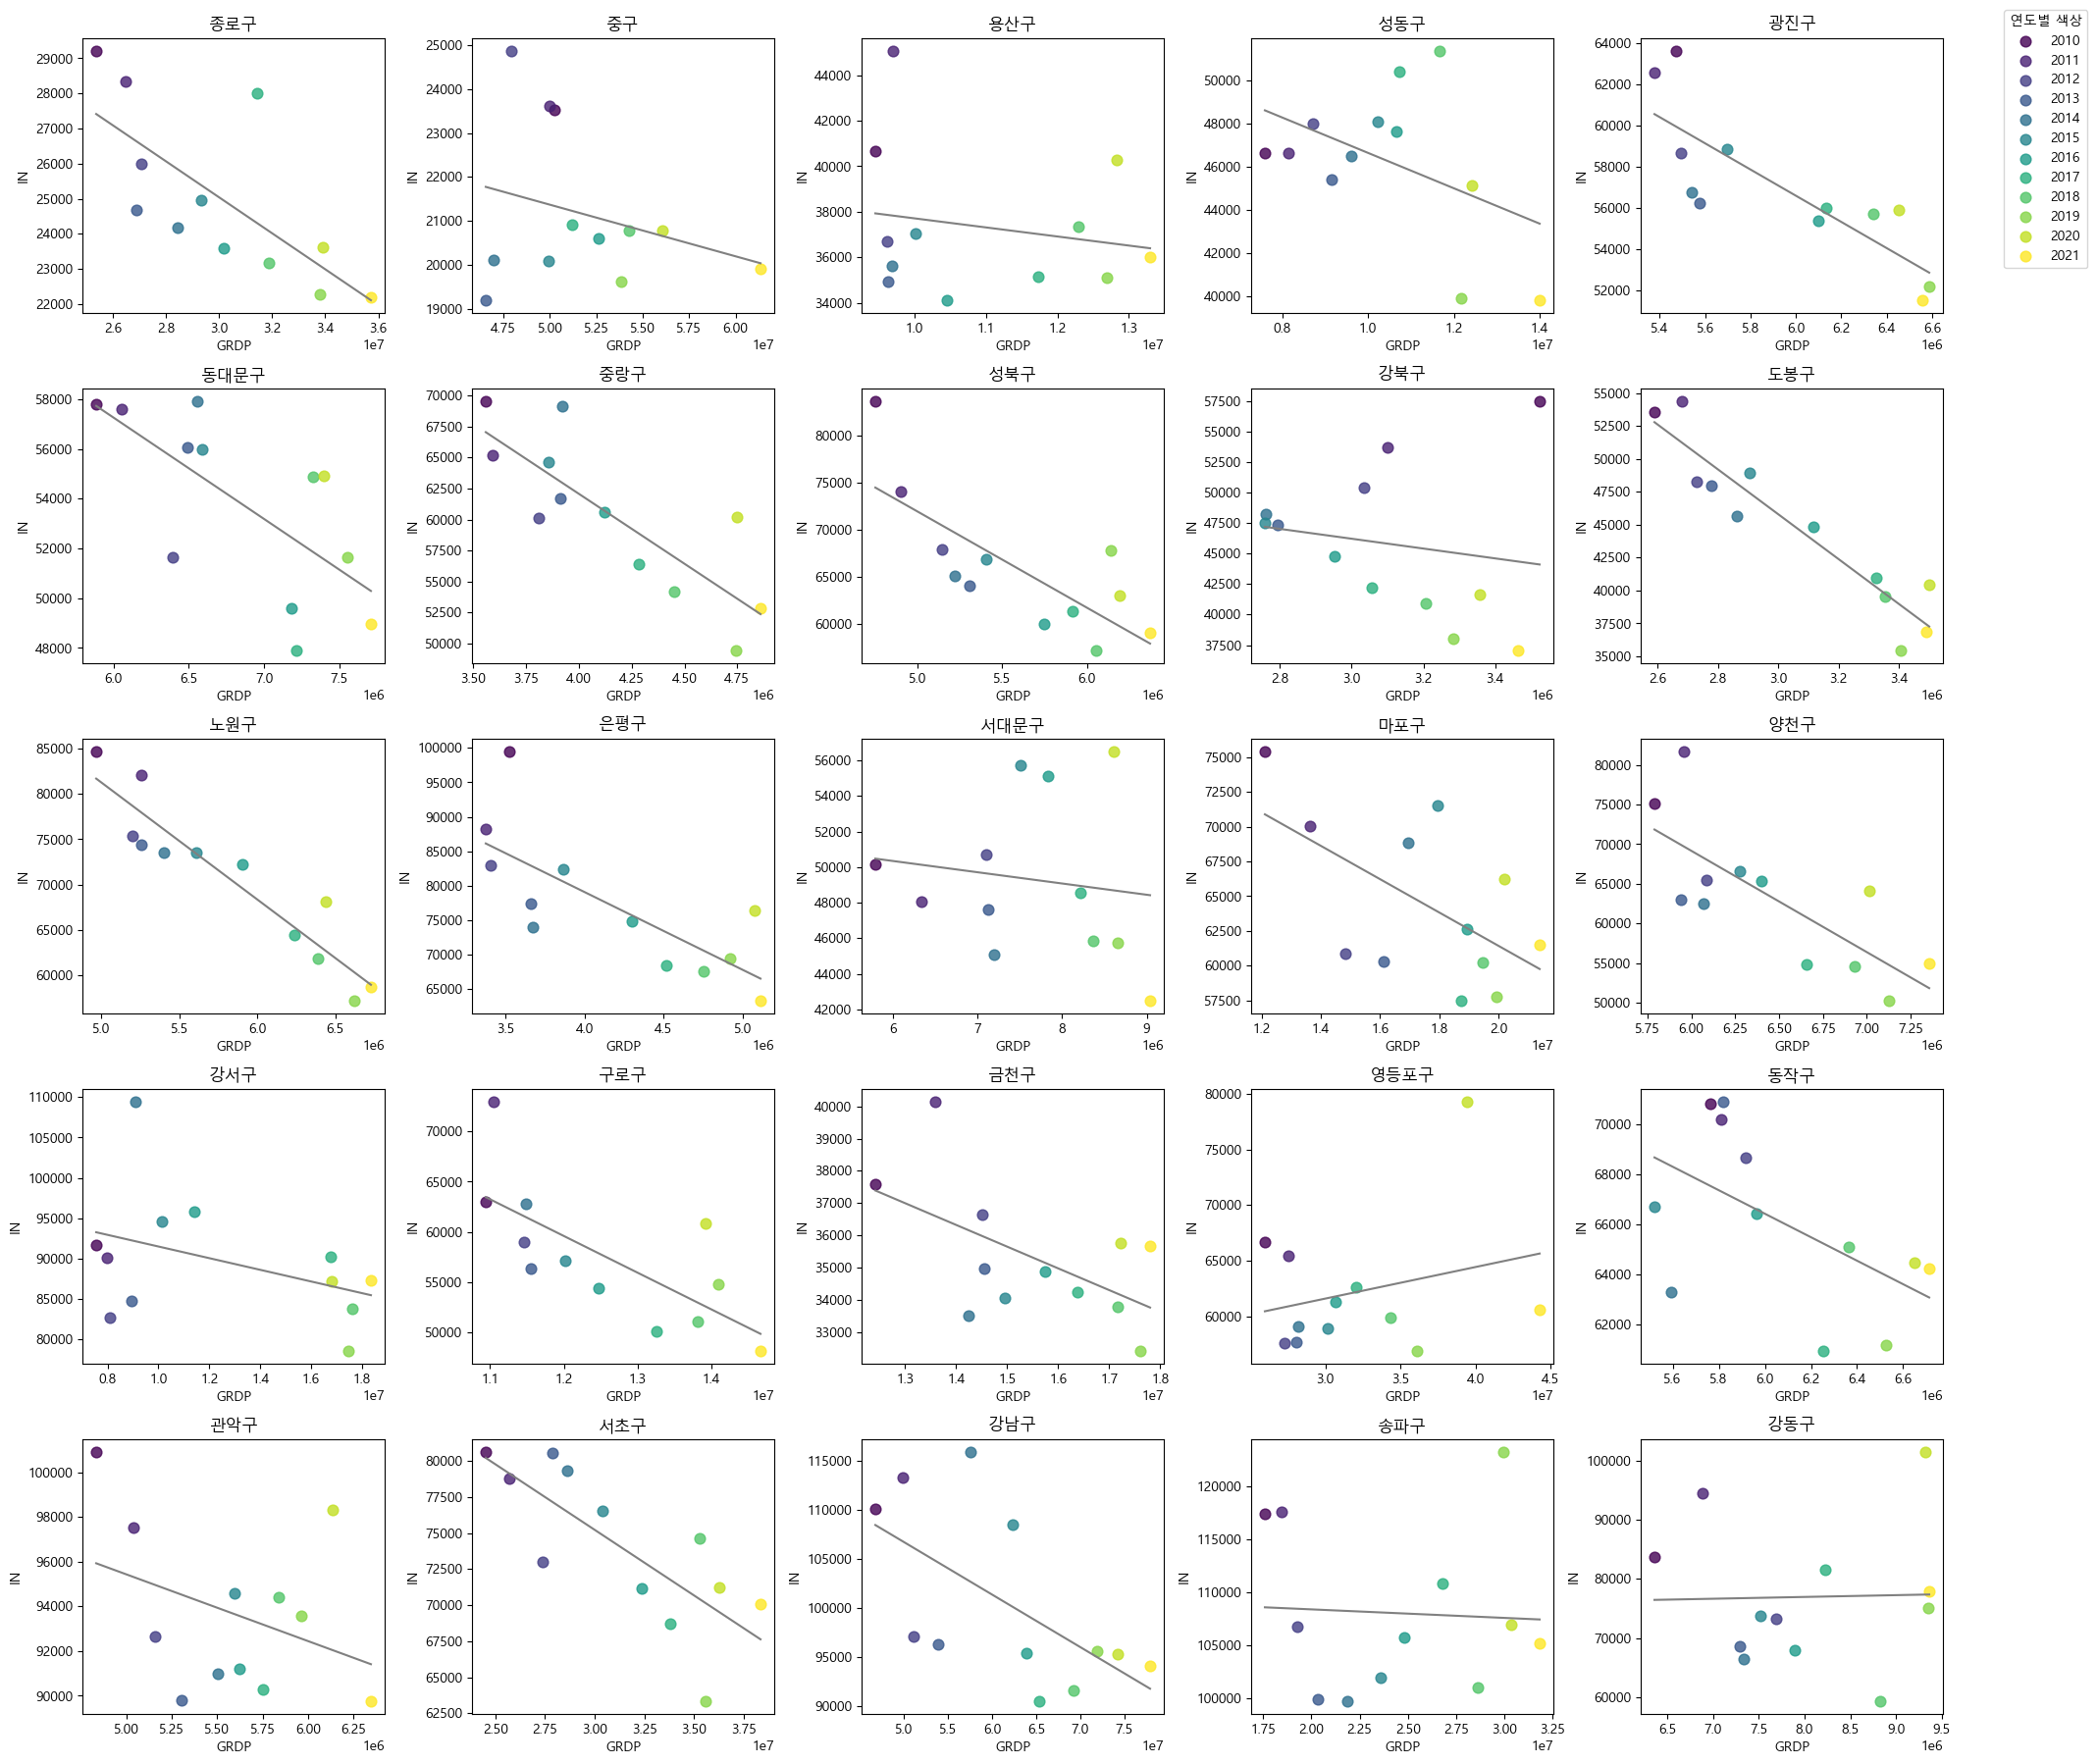

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 📂 파일 불러오기
grdp_df = pd.read_excel('GRDP1.xlsx')
in_df = pd.read_excel('inpeo.xlsx')

# 📌 인덱스 설정
grdp_df.set_index(grdp_df['시점'], inplace=True)
in_df.set_index(grdp_df['시점'], inplace=True)

# 불필요한 첫 번째 컬럼 제거
grdp_df.drop(grdp_df.columns[0], axis=1, inplace=True)
in_df.drop(in_df.columns[0], axis=1, inplace=True)

# 📍 서울시 25개 자치구 리스트
seoul_list = [
    "종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", 
    "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", 
    "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", 
    "송파구", "강동구"
]

# 📊 5x5 서브플롯 생성
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 18))
axes = axes.flatten()

# 🎨 컬러맵 설정 (연도별 색상 구별)
years = grdp_df.index.astype(str)  # 연도를 문자열로 변환
num_years = len(years)
colors = cm.viridis(np.linspace(0, 1, num_years))  # viridis 컬러맵 사용

# 🎨 각 구에 대한 산점도 그래프 (연도별 색상 적용)
for i, region in enumerate(seoul_list):
    GRDP_data = np.array(grdp_df[region])
    in_data = np.array(in_df[region])
    
    # 연도별 다른 색상으로 산점도 표시
    for j, year in enumerate(years):
        axes[i].scatter(GRDP_data[j], in_data[j], color=colors[j], label=year if i == 0 else "", alpha=0.8, s=60)

    axes[i].set_title(region)
    axes[i].set_xlabel('GRDP')
    axes[i].set_ylabel('IN')

    # 선형 회귀선 추가
    poly_fit = np.polyfit(GRDP_data, in_data, 1)
    poly_1d = np.poly1d(poly_fit)
    
    xs = np.linspace(GRDP_data.min(), GRDP_data.max())
    ys = poly_1d(xs)
    
    axes[i].plot(xs, ys, color='gray')

# 📌 범례를 그래프 바깥으로 이동 (오른쪽 바깥쪽에 위치)
fig.legend(labels=years, loc='upper left', bbox_to_anchor=(1.02, 1), title="연도별 색상")

# 📌 여백 조정 (그래프 영역을 축소하여 범례와 겹치지 않게 함)
plt.subplots_adjust(right=0.8)  # 그래프 오른쪽 여백 조정

plt.tight_layout()
plt.show()